## Particle filters, 

also known as sequential Monte Carlo methods, are a set of advanced statistical techniques used to estimate the state of a dynamic system where the state is not directly observable. Essentially, particle filters are used to implement a Bayesian filter by Monte Carlo simulations, and they are particularly well-suited for systems that are non-linear and/or have non-Gaussian noise.

## Cloud of Bees

A good way to visualize how particle filters work conceptually is to think about them in terms of a "cloud of guesses" that evolves over time to more accurately represent a moving target's location within some environment. Here’s a step-by-step mental picture:

Imagine a Swarm of Bees
Initial Guess: Imagine you start with a swarm of bees spread out over a large area because you initially don't know where a hidden flower (the state you want to estimate) is located. Each bee represents a guess at where the flower might be.

Swarm Movement (Prediction): As time progresses, the bees move based on the wind (the process model) which pushes them in different directions. This spread of bees now represents a new set of guesses about where the flower could have moved, taking into account some randomness in their flight paths.

New Information (Update): Suddenly, you receive a hint about the smell of the flower from a specific location (this is new measurement data). Each bee then adjusts slightly based on how strong the scent is at its current position. Bees closer to where the smell is stronger believe they are closer to the flower, so they increase in importance or weight.

Focus the Search (Resampling): You notice that many bees are far from where the strongest scent was detected and are likely not useful. So, you call these bees back, and instead, allow the bees that are in areas of stronger scent to split into more bees. This resampling step effectively focuses the swarm towards more likely areas.

Estimating Location: Now, looking at where the densest part of the swarm is, you can make a good guess about where the flower is likely located. This dense cluster represents the combined guess of the swarm, refined through movement, data updates, and focusing on more likely areas.




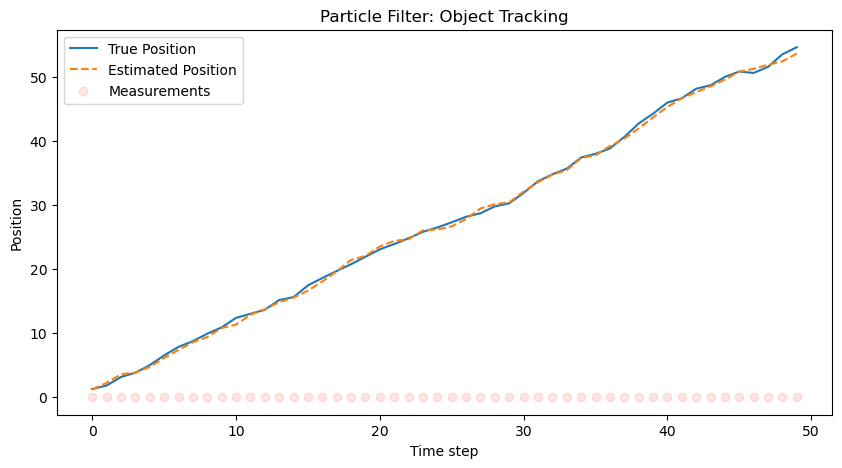

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Number of particles
num_particles = 1000

# Initial position and velocity of the object
initial_position = 0.0
initial_velocity = 1.0  # 1 unit per time step

# Standard deviation of the process and measurement noise
process_noise_std = 0.5
measurement_noise_std = 2.0

# Time steps
num_steps = 50

# True initial state
x_true = initial_position

# Array to store the true states
true_positions = []

# Initialize particles
particles = np.random.normal(initial_position, process_noise_std, num_particles)
weights = np.ones(num_particles) / num_particles

# Record the estimated positions
estimated_positions = []

# Simulation of the object and filtering process
for t in range(num_steps):
    # Move the true state
    x_true += initial_velocity + np.random.normal(0, process_noise_std)
    true_positions.append(x_true)
    
    # Simulate measurement
    measurement = x_true + np.random.normal(0, measurement_noise_std)
    
    # Predict step: move every particle according to the system dynamics
    particles += initial_velocity + np.random.normal(0, process_noise_std, num_particles)
    
    # Update step: update weights based on measurement likelihood
    weights *= np.exp(-(particles - measurement) ** 2 / (2 * measurement_noise_std ** 2))
    weights /= np.sum(weights)  # Normalize weights
    
    # Resample step: resample particles based on updated weights
    indices = np.random.choice(range(num_particles), size=num_particles, replace=True, p=weights)
    particles = particles[indices]
    weights = np.ones(num_particles) / num_particles
    
    # Estimate the state
    estimated_position = np.average(particles, weights=weights)
    estimated_positions.append(estimated_position)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(true_positions, label='True Position')
plt.plot(estimated_positions, label='Estimated Position', linestyle='--')
plt.scatter(range(num_steps), [initial_position] * num_steps, c='r', marker='o', alpha=0.1, label='Measurements')  # Simulated measurements scatter
plt.legend()
plt.xlabel('Time step')
plt.ylabel('Position')
plt.title('Particle Filter: Object Tracking')
plt.show()
